#                       Detailed and In-depth analysis of Titanic [0.85074]

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
train = pd.read_csv(r"F:\Kaggle\titanic\train.csv")
test = pd.read_csv(r"F:\Kaggle\titanic\test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df = train.copy()

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# from train.describe() it is evident that only 38.38 % of the population on the ship survived , rest died

In [9]:
df.loc[(df.Survived == 1) & (df.Sex == "male") , :].count()

PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age             93
SibSp          109
Parch          109
Ticket         109
Fare           109
Cabin           45
Embarked       109
dtype: int64

In [10]:
# there were 109 males across the ship who survived that accident

In [11]:
df.loc[(df.Survived == 1) & (df.Sex == "female") , :].count()

PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            197
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       231
dtype: int64

In [12]:
# there were 233 females across the ship who survived that accident
# look the following graph

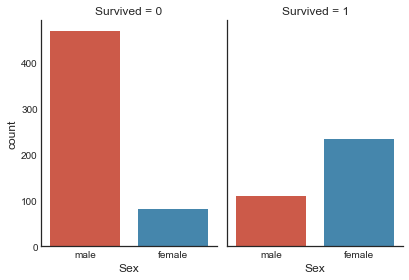

In [13]:
sns.factorplot(x="Sex",col="Survived", data=df , kind="count",size=4, aspect=.7);

In [14]:
# this gives us the idea that males died more and females survived more

In [15]:
# similarly

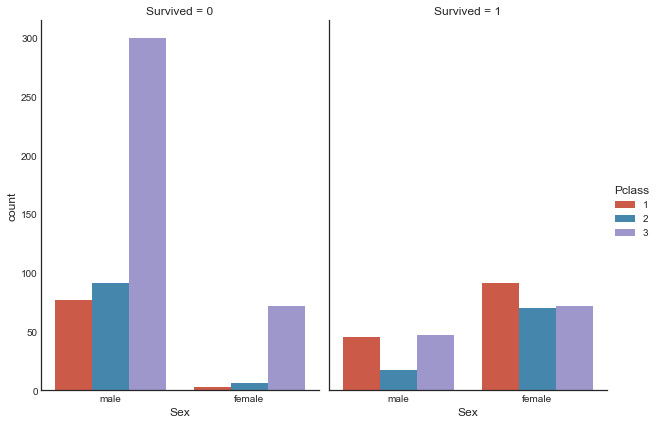

In [16]:
sns.factorplot(x="Sex", hue = "Pclass" , col="Survived", data=df , kind="count",size=6, aspect=.7);

#### overall the males and females of Pclass 3 died more than others
#### the males of Pclass 3 showed a remarkable increase in death and shoots the graph up , same goes to the females in
#### same goes to the females in survived = 0
#### in survived = 0 , showing increasing trend in death as class shifts down

#### In survived = 1 females showed a near fall down trend as expected but pclass=2 females survived less than the Pclass=3 females

#### But the males on contrary showed a dip in between i.e. 
#### in males who survived , Plass -->  3 > 1 > 2


#### i.e Survived Pclass=3 males survived more than the survived Pclass=1 males and survived Pclass=2 males
#### the above is evident from the following inspection
#### although survived male Plass = 3 is slightly greater than survived male Plass = 1

In [17]:
df.loc[(df.Survived == 1) & (df.Sex == "male") & (df.Pclass == 1)].count()

PassengerId    45
Survived       45
Pclass         45
Name           45
Sex            45
Age            40
SibSp          45
Parch          45
Ticket         45
Fare           45
Cabin          39
Embarked       45
dtype: int64

In [18]:
df.loc[(df.Survived == 1) & (df.Sex == "male") & (df.Pclass == 2) , :].count()

PassengerId    17
Survived       17
Pclass         17
Name           17
Sex            17
Age            15
SibSp          17
Parch          17
Ticket         17
Fare           17
Cabin           4
Embarked       17
dtype: int64

In [19]:
df.loc[(df.Survived == 1) & (df.Sex == "male") & (df.Pclass == 3) , :].count()

PassengerId    47
Survived       47
Pclass         47
Name           47
Sex            47
Age            38
SibSp          47
Parch          47
Ticket         47
Fare           47
Cabin           2
Embarked       47
dtype: int64

In [20]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [21]:
# All in all including both the sexes 2nd class survived less than the other two clases

In [22]:
df.Survived[df.Pclass == 1].sum()/df[df.Pclass == 1].Survived.count()

0.62962962962962965

In [23]:
df.Survived[df.Pclass == 2].sum()/df[df.Pclass == 2].Survived.count()

0.47282608695652173

In [24]:
df.Survived[df.Pclass == 3].sum()/df[df.Pclass == 3].Survived.count()

0.24236252545824846

In [25]:
# % survived in Pclass = 1  --> 62.96 %  , similarly calculated for others

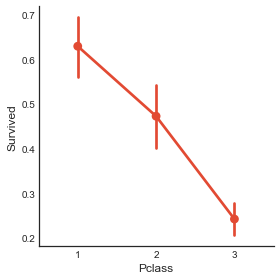

In [26]:
sns.factorplot(x='Pclass',y='Survived', kind="point" ,data=df)

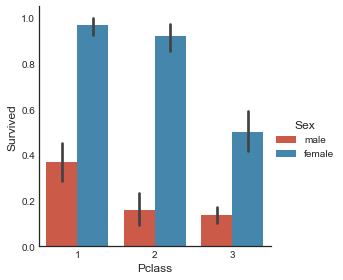

In [27]:
sns.factorplot('Pclass','Survived',kind="bar",hue='Sex',data=df)

In [28]:
# A cross-tabulation to further inspect

In [29]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

In [30]:
# Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died

In [31]:
# lets see how survivals varies with Embarked

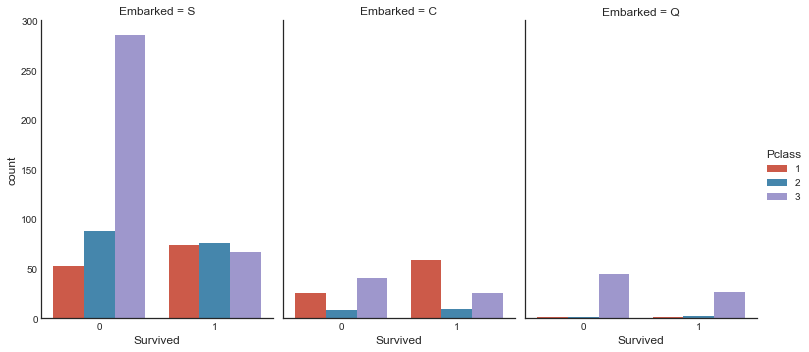

In [32]:
sns.factorplot(x="Survived",col="Embarked",data=df ,hue="Pclass", kind="count",size=5, aspect=.7);

In [33]:
# this shows that those who were embarked S survived more than those who were survived C and then Q
# Most of the people who died were embarked S

In [34]:
# Also , people survived with embarked Q were mostly from Plass 3 females

In [35]:
# A more closer look with cross-tab

In [36]:
pd.crosstab([df.Survived], [df.Sex, df.Pclass, df.Embarked], margins=True).style.background_gradient(cmap='autumn_r')

In [37]:
# can also be viewed like this

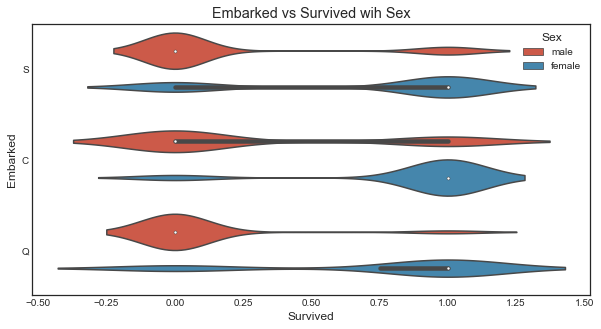

In [38]:
plt.subplots(figsize = (10,5))
plt.title('Embarked vs Survived wih Sex')
sns.violinplot(x = "Survived", y = "Embarked", hue = "Sex",data = df)
plt.show()

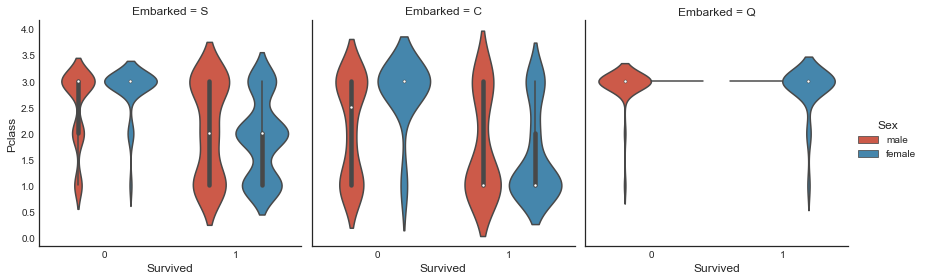

In [39]:
# similarly with Pclass

sns.factorplot(x = "Survived", y = "Pclass",col = "Embarked" , hue = "Sex" , kind = "violin",data = df)


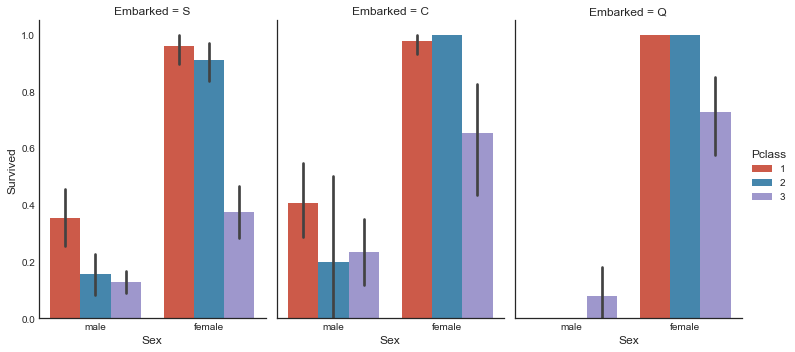

In [40]:
sns.factorplot(x="Sex", y="Survived",col="Embarked",data=df ,hue="Pclass",kind="bar",size=5, aspect=.7);

In [41]:
# Inferences from above graph

# the survived axis shows the % .
# which means embarked Q males in Pclass 1 and 2 were all died

# while embarked females in Pclass 1 and 2 all lived....
# also nearly Pclass 1 and 2 females of all embarked types lived

In [42]:
context1 = {"female":0 , "male":1}
context2 = {"S":0 , "C":1 , "Q":2}
df['Sex_bool']=df.Sex.map(context1)
df["Embarked_bool"] = df.Embarked.map(context2)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bool,Embarked_bool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.0


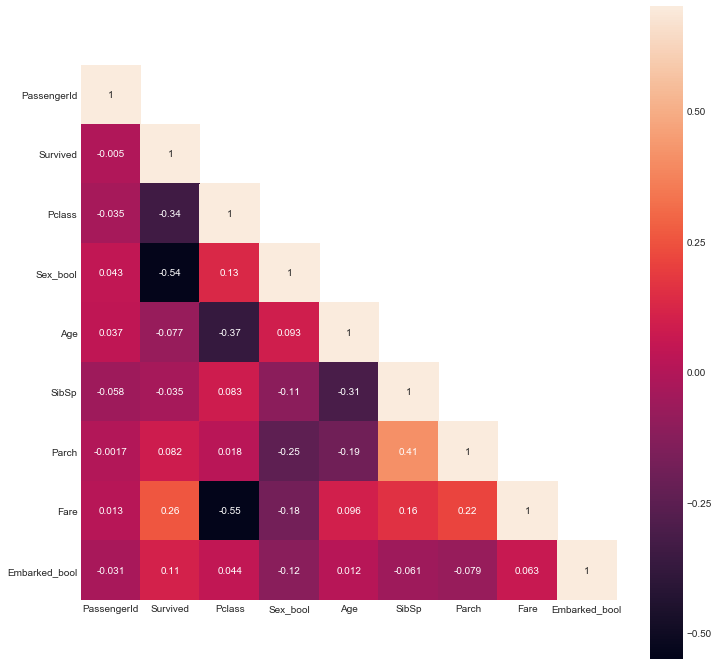

In [44]:
correlation_map = df[['PassengerId', 'Survived', 'Pclass', 'Sex_bool', 'Age', 'SibSp',
       'Parch', 'Fare' , 'Embarked_bool']].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

### The above heatmap shows the overall picture very clearly 

###  PassengerId is a redundant column as its very much less related to all other attributes , we can remove it .

###  Also , Survived is related indirectly with Pclass and also we earlier proved that as Pclass value increases Survival decreases

###  Pclass and Age are also inversely related and can also be proven by the following cell  that as Pclass decreases , the mean of the Age increases ,  means the much of the older travellers are travelling in high class .
              
###  Pclass and fare are also highly inversely related as the fare of Pclass 1 would obviously be higher than corresponding Pclass 2 and 3 .
###  Also , people with lower ages or children are travelling with their sibling and parents more than higher aged people (following an inverse relation) , which is quite a bit obvious .
###  Parch and SibSp are also highly directly related
###  Sex_bool and Survived people are highly inversely related , i.e. females are more likely to survive than men

In [45]:
df.groupby("Pclass").Age.mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [46]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Sex_bool           0
Embarked_bool      2
dtype: int64

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bool,Embarked_bool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.0


In [48]:
for x in [train, test,df]:
    x['Age_bin']=np.nan
    for i in range(8,0,-1):
        x.loc[ x['Age'] <= i*10, 'Age_bin'] = i

In [49]:
df[["Age" , "Age_bin"]].head(10)

,Age,Age_bin
0,22.0,3.0
1,38.0,4.0
2,26.0,3.0
3,35.0,4.0
4,35.0,4.0
5,NaN,NaN
6,54.0,6.0
7,2.0,1.0
8,27.0,3.0
9,14.0,2.0


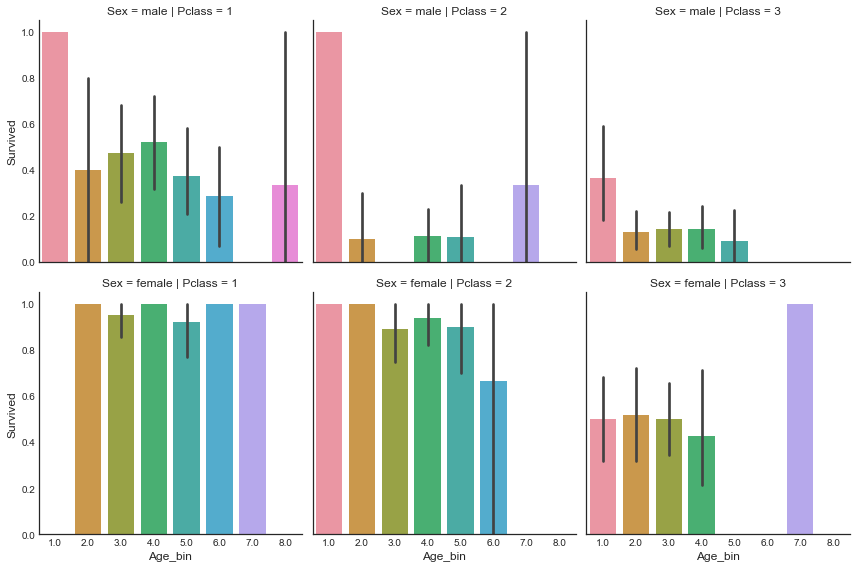

In [50]:
sns.factorplot('Age_bin','Survived', col='Pclass' , row = 'Sex',kind="bar", data=df)

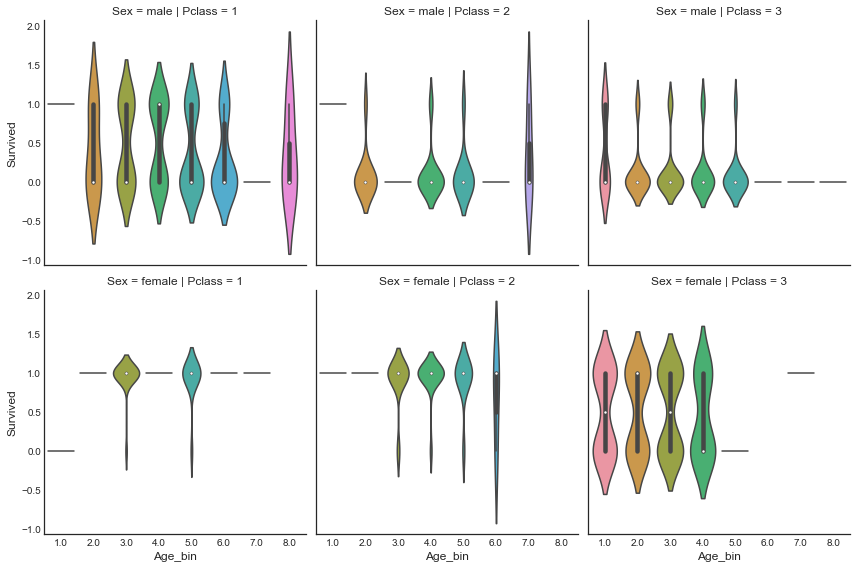

In [51]:
sns.factorplot('Age_bin','Survived', col='Pclass' , row = 'Sex', kind="violin", data=df)

In [52]:
pd.crosstab([df.Sex, df.Survived], [df.Age_bin, df.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [53]:
#  All female in Pclass 3 and Age_bin = 5 died.
#  Males in Age_bin >= 2 and Pclass died more than survived or died greater than 50% .

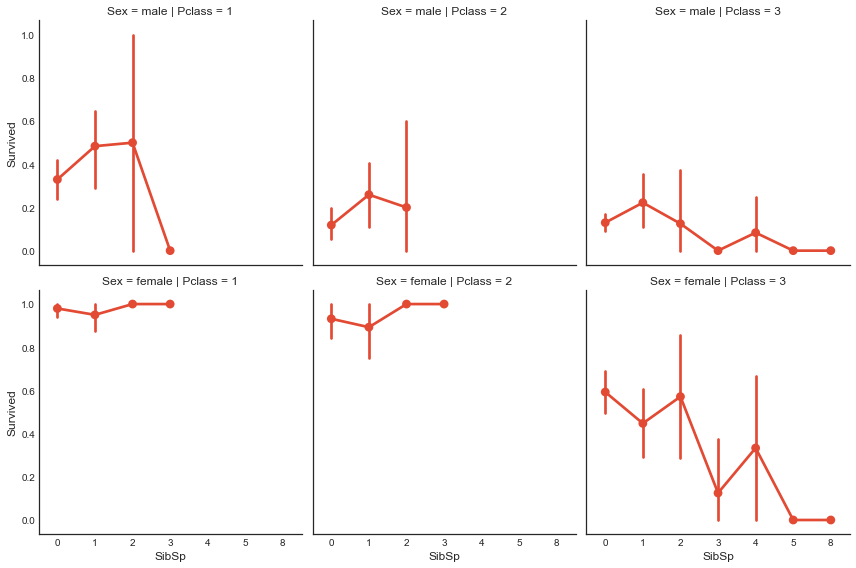

In [54]:
sns.factorplot('SibSp', 'Survived', col='Pclass' , row = 'Sex', data=df )

In [55]:
#  Females in Pclass 1 and 2 with siblings upto 3 nearly all survived

In [56]:
#  For Pclass 3 , males and females showed a near decreasing trend as number of siblings increased .

In [57]:
#  For males, no survival rate above 0.5 for any values of SibSp. (less than 50 %)

In [58]:
pd.crosstab([df.Sex, df.Survived], [df.Parch, df.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [59]:
#  For males,all survival rates below 0.5 for any values of Parch, except for Parch = 2 and Pclass = 1.

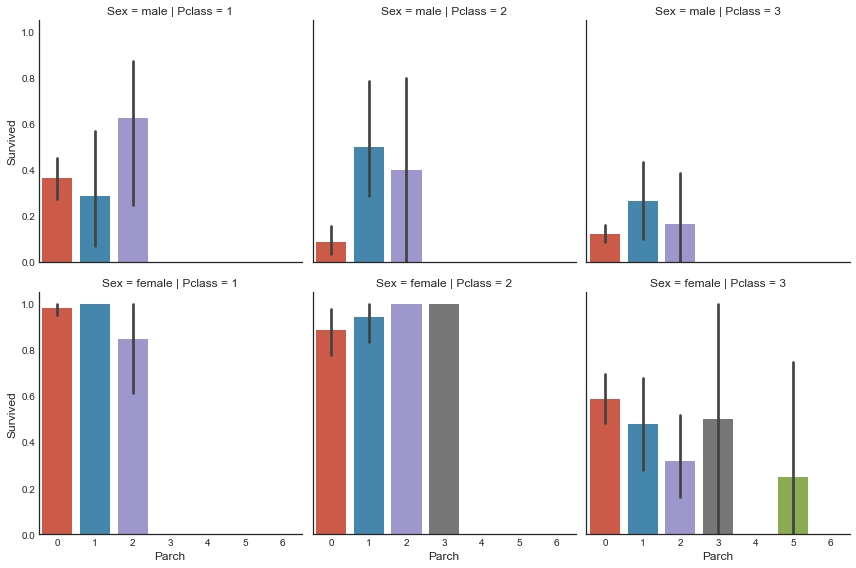

In [60]:
sns.factorplot('Parch', 'Survived', col='Pclass' , row = 'Sex', kind="bar", data=df )

In [61]:
# the distribution of Age_bin , SibSp and Parch as follows

In [62]:
for x in [train, test , df]:
    x['Fare_bin']=np.nan
    for i in range(12,0,-1):
        x.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

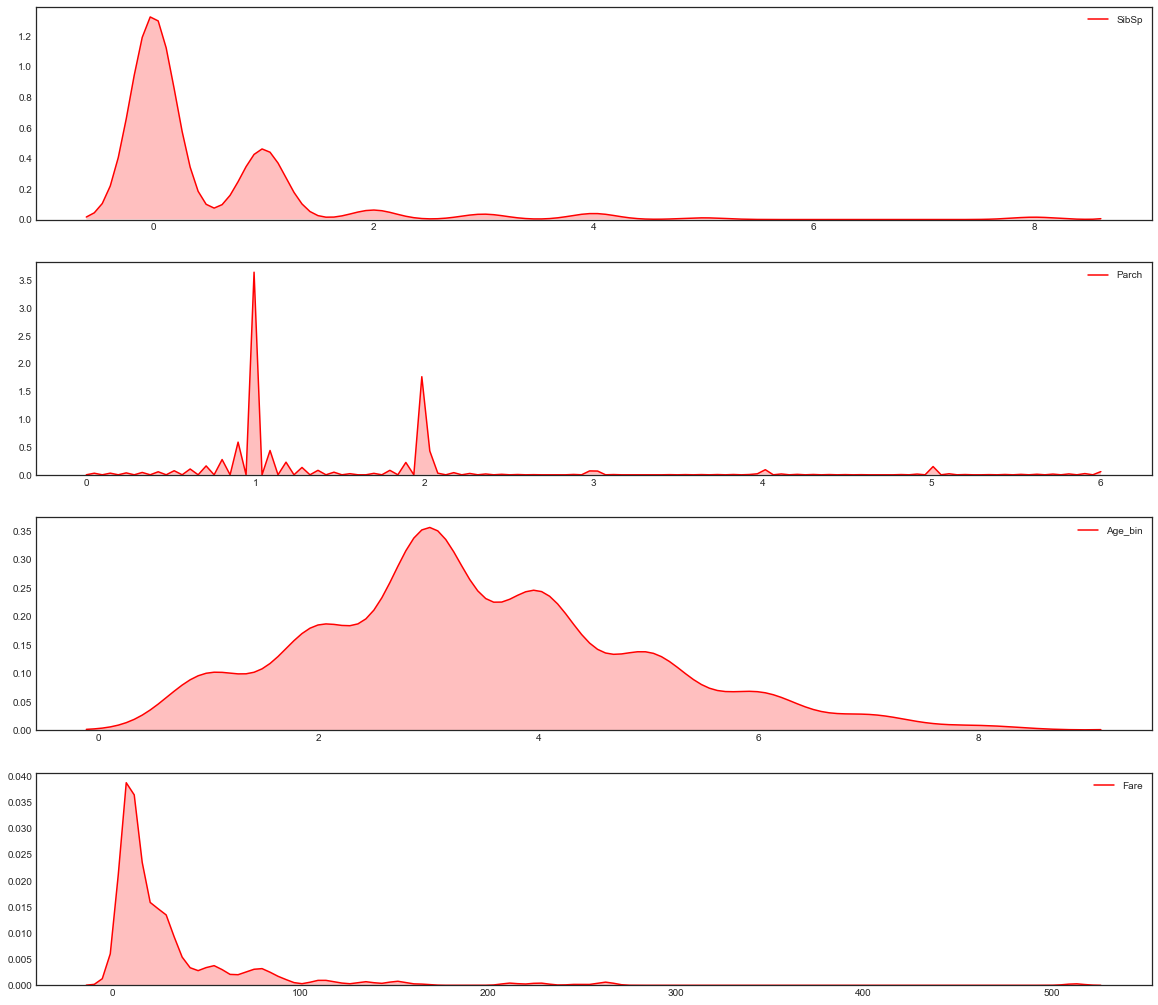

In [63]:
fig, axes = plt.subplots(4,1)
fig.set_size_inches(20, 18)
sns.kdeplot(df.SibSp , shade=True, color="red" , ax= axes[0])
sns.kdeplot(df.Parch , shade=True, color="red" , ax= axes[1])
sns.kdeplot(df.Age_bin , shade=True, color="red" , ax= axes[2])
sns.kdeplot(df.Fare , shade=True, color="red" , ax= axes[3])
plt.show()

###  Maximum people are with no siblings travelling
###  more people were travelling with only their 1 parent rather than 2 
###  maximum population on the ship was aged between 15 yrs to 50 yrs.
###  most of the people only paid upto 50 as their fare

In [64]:
# introducing Fare_bin the same way as done in the Age_bin above but with a gap of 50

In [65]:
df[["Fare" , "Fare_bin"]].head(10)

,Fare,Fare_bin
0,7.2500,1.0
1,71.2833,2.0
2,7.9250,1.0
3,53.1000,2.0
4,8.0500,1.0
5,8.4583,1.0
6,51.8625,2.0
7,21.0750,1.0
8,11.1333,1.0
9,30.0708,1.0


In [66]:
pd.crosstab([df.Sex, df.Survived], [df.Fare_bin, df.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

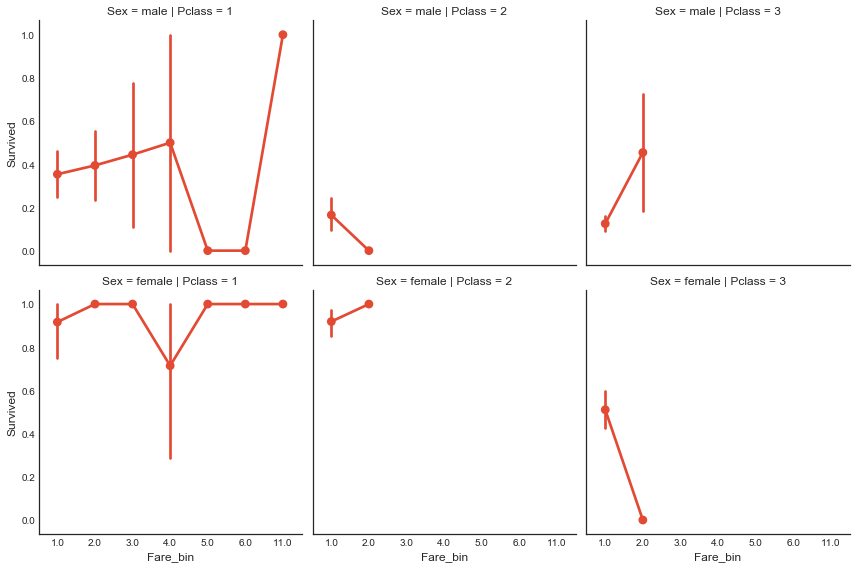

In [67]:
sns.factorplot('Fare_bin','Survived', col='Pclass' , row = 'Sex', data=df)
plt.show()

In [68]:
df_test = test.copy()

In [69]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,4.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,5.0,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,7.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3.0,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3.0,1.0


In [70]:
df.drop(['PassengerId','Sex','Embarked','Name','Ticket', 'Cabin', 'Age', 'Fare'],axis=1,inplace=True)
df.head()

,Survived,Pclass,SibSp,Parch,Sex_bool,Embarked_bool,Age_bin,Fare_bin
0,0,3,1,0,1,0.0,3.0,1.0
1,1,1,1,0,0,1.0,4.0,2.0
2,1,3,0,0,0,0.0,3.0,1.0
3,1,1,1,0,0,0.0,4.0,2.0
4,0,3,0,0,1,0.0,4.0,1.0


In [71]:
context1 = {"female":0 , "male":1}
context2 = {"S":0 , "C":1 , "Q":2}
df_test['Sex_bool']=df_test.Sex.map(context1)
df_test["Embarked_bool"] = df_test.Embarked.map(context2)
df_test.drop(['PassengerId','Sex','Embarked','Name','Ticket', 'Cabin', 'Age', 'Fare'],axis=1,inplace=True)
df_test.head()

,Pclass,SibSp,Parch,Age_bin,Fare_bin,Sex_bool,Embarked_bool
0,3,0,0,4.0,1.0,1,2
1,3,1,0,5.0,2.0,0,0
2,2,0,0,7.0,1.0,1,2
3,3,0,0,3.0,2.0,1,0
4,3,1,1,3.0,1.0,0,0


In [72]:
df.isnull().sum()

Survived           0
Pclass             0
SibSp              0
Parch              0
Sex_bool           0
Embarked_bool      2
Age_bin          177
Fare_bin           0
dtype: int64

In [73]:
df_test.isnull().sum()

Pclass            0
SibSp             0
Parch             0
Age_bin          86
Fare_bin          0
Sex_bool          0
Embarked_bool     0
dtype: int64

In [74]:
#  Age_bin in both dataframes is still possessing null values

In [75]:
df_test.Age_bin.fillna(df_test.Age_bin.mean() , inplace=True)

In [76]:
df.Age_bin.fillna(df.Age_bin.mean() , inplace=True)

In [77]:
df.Embarked_bool.fillna(df.Embarked_bool.mean() , inplace=True)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.3, random_state=101)

In [79]:
MLA = []
x = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() , GaussianNB() ,
    RandomForestClassifier() , GradientBoostingClassifier()]

X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" , "GaussianNB" ,
    "RandomForestClassifier" , "GradientBoostingClassifier"]

for i in range(0,len(x)):
    model = x[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    MLA.append(accuracy_score(pred , y_test))

In [80]:
MLA

[0.77611940298507465,
 0.79850746268656714,
 0.77611940298507465,
 0.79477611940298509,
 0.75,
 0.78731343283582089,
 0.80223880597014929]

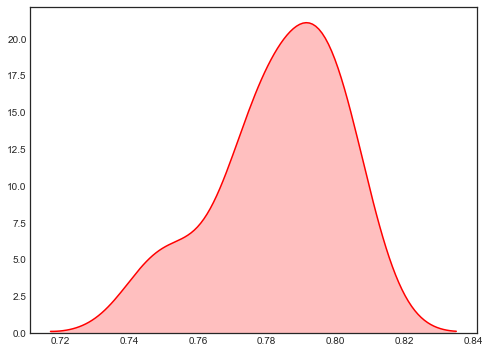

In [81]:
sns.kdeplot(MLA , shade=True, color="red")

In [82]:
#  this proves that much of the algorithms are giving the accuracy between 77 % to 80 % with some above 80 % .
#  thats a pretty much good estimation 

In [83]:
d = { "Accuracy" : MLA , "Algorithm" : X }
dfm = pd.DataFrame(d)

In [84]:
# making a dataframe of the list of accuracies calculated above

In [85]:
dfm   # a dataframe wilh all accuracies and their corresponding algorithm name

,Accuracy,Algorithm
0,0.776119,LinearSVC
1,0.798507,DecisionTreeClassifier
2,0.776119,LogisticRegression
3,0.794776,KNeighborsClassifier
4,0.750000,GaussianNB
5,0.787313,RandomForestClassifier
6,0.802239,GradientBoostingClassifier


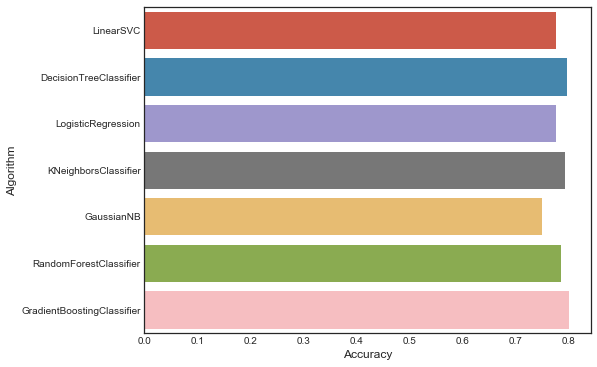

In [86]:
sns.barplot(x="Accuracy", y="Algorithm", data=dfm)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.3, random_state=66)
model = KNeighborsClassifier(n_neighbors=6)
model.fit( X_train , y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [88]:
pred = model.predict(X_test)

In [89]:
answer = model.predict(df_test)

In [90]:
print (accuracy_score(pred , y_test))

0.850746268657


# So , the accuracy turns out to be 85.074 % with n-neighbors = 6,
# lets check for other n-neighbors .

In [91]:
#  lets check it till 30 neighbours that which has got the maximum accuracy score

KNNaccu = []
Neighbours = []

for neighbour in range(1,31):
    model = KNeighborsClassifier(n_neighbors=neighbour)
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    KNNaccu.append(accuracy_score(pred , y_test))
    Neighbours.append(neighbour)

In [92]:
d = { "Neighbours" : Neighbours , "Accuracy" : KNNaccu }
knndf = pd.DataFrame(d)

In [93]:
knndf.head()

,Accuracy,Neighbours
0,0.809701,1
1,0.828358,2
2,0.832090,3
3,0.847015,4
4,0.832090,5


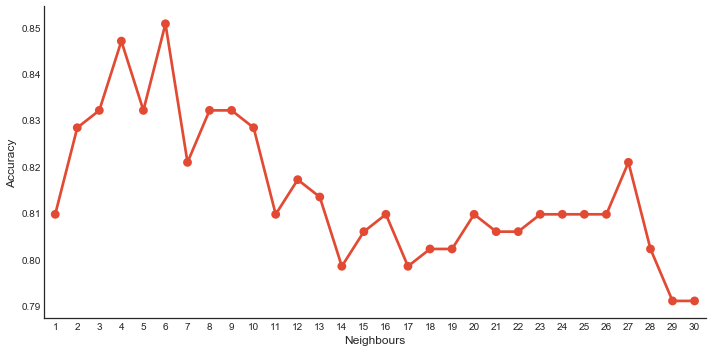

In [94]:
sns.factorplot(x="Neighbours", y="Accuracy",size = 5 , aspect = 2 , data=knndf)

###  This states that for Neighbours = 6 , the accuracy is the maximum  .

In [95]:
#  making a csv file of the predictions

In [96]:
d = { "PassengerId":test.PassengerId , "Survived":answer }
final = pd.DataFrame(d)
final.to_csv( 'titanic_again.csv' , index = False )

#  
##  THANK YOU